<a href="https://colab.research.google.com/github/ruben-adhesif/Database/blob/main/09_11_2020%20SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - SQLite Pandas Exemple

In [9]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [10]:
with con:
    con.execute("""
          CREATE TABLE USER (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            age INTEGER
          );
        """)

In [11]:
sql = 'INSERT INTO USER (id, name, age) values(?,?,?)'
data = [
    (1,'Alice', 21),
    (2,'Bob', 22),
    (3,'Chris', 23)
]

In [12]:
with con:
    con.executemany(sql,data)

In [13]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age <= 22")
    for row in data:
      print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


# 2 - Integrate SQLite with Pandas

In [14]:
import pandas as pd
df_skill = pd.DataFrame({
  'user_id': [1,1,2,2,3,3,3],
  'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']

})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [ ]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
  SELECT s.user_id, u.name, u.age, s.skill
  FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


# 3 - Using SQLite as a time series Database

In [15]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [16]:
%sql sqlite:///demo.db

'Connected: @demo.db'

In [17]:
%sql SELECT date('now');

 * sqlite:///demo.db
Done.


date('now')
2022-11-13


In [18]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day')

 * sqlite:///demo.db
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [19]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [20]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [21]:
def dt(days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform(18, 26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite:///demo.db
1 rows affected.
 * sqlite://

In [22]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db
Done.


Date,Temperature
2021-07-01 01:14:59,24.4699795457075
2021-07-02 01:14:59,23.84554886132698
2021-07-03 01:14:59,22.73437027504166
2021-07-04 01:14:59,21.4659519372686
2021-07-05 01:14:59,25.003184552407372


In [23]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-07-01 01:14:59.219018,24.4699795457075
2021-07-02 01:14:59.219018,23.84554886132698
2021-07-03 01:14:59.219018,22.73437027504166
2021-07-04 01:14:59.219018,21.4659519372686
2021-07-05 01:14:59.219018,25.003184552407372
2021-07-06 01:14:59.219018,22.154043870630304
2021-07-07 01:14:59.219018,22.269235056964973
2021-07-08 01:14:59.219018,19.037350982431565
2021-07-09 01:14:59.219018,20.370044667698277
2021-07-10 01:14:59.219018,20.784291565605763


In [24]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-01 01:14:59.219018,24.4699795457075
2021-07-02 01:14:59.219018,23.84554886132698
2021-07-03 01:14:59.219018,22.73437027504166
2021-07-04 01:14:59.219018,21.4659519372686
2021-07-05 01:14:59.219018,25.003184552407372
2021-07-06 01:14:59.219018,22.154043870630304
2021-07-07 01:14:59.219018,22.269235056964973
2021-07-08 01:14:59.219018,19.037350982431565
2021-07-09 01:14:59.219018,20.370044667698277
2021-07-10 01:14:59.219018,20.784291565605763


In [25]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
        AVG(Temperature) AS MEAN_TMP,
        MAX(Temperature) AS MAX_TMP,
        MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,21.824485709910803,25.983797229521652,18.01263462929142
2022,21.84524126546672,25.98139206980349,18.00777962204751


In [26]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db
Done.


DatetimeIndex(['2021-07-01 01:14:59', '2021-07-02 01:14:59',
               '2021-07-03 01:14:59', '2021-07-04 01:14:59',
               '2021-07-05 01:14:59', '2021-07-06 01:14:59',
               '2021-07-07 01:14:59', '2021-07-08 01:14:59',
               '2021-07-09 01:14:59', '2021-07-10 01:14:59',
               ...
               '2022-11-03 01:14:59', '2022-11-04 01:14:59',
               '2022-11-05 01:14:59', '2022-11-06 01:14:59',
               '2022-11-07 01:14:59', '2022-11-08 01:14:59',
               '2022-11-09 01:14:59', '2022-11-10 01:14:59',
               '2022-11-11 01:14:59', '2022-11-12 01:14:59'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

In [27]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-01 01:14:59.219018,24.4699795457075
2021-07-02 01:14:59.219018,23.84554886132698
2021-07-03 01:14:59.219018,22.73437027504166
2021-07-04 01:14:59.219018,21.4659519372686
2021-07-05 01:14:59.219018,25.003184552407372
2021-07-06 01:14:59.219018,22.154043870630304
2021-07-07 01:14:59.219018,22.269235056964973
2021-07-08 01:14:59.219018,19.037350982431565
2021-07-09 01:14:59.219018,20.370044667698277
2021-07-10 01:14:59.219018,20.784291565605763


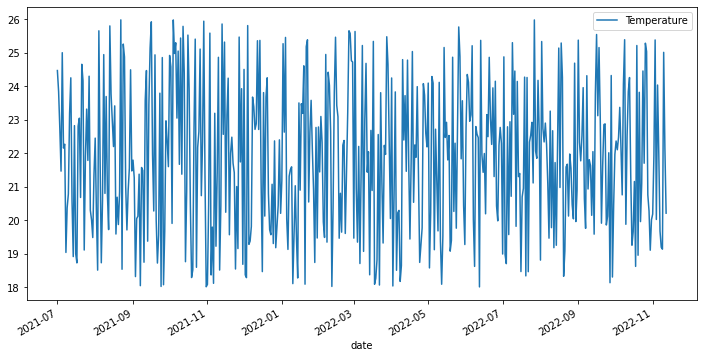

In [28]:
df.plot(figsize=(12,6))